In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

from utils.Lang import Lang
from utils.helpers import *

from models.generator import *
from models.discriminator import *

from main import *
from params import *

%matplotlib inline

In [2]:
input_lang, output_lang, pairs = prepareData('eng', 'fra', True, max_length=MAX_LENGTH)
print(random.choice(pairs))

Reading lines...
Read 135842 sentence pairs
Trimmed to 10853 sentence pairs
Counting words...
Counted words:
fra 4489
eng 2925
['vous n etes pas en retard .', 'you re not late .']


In [3]:
generator = Generator(input_size=input_lang.n_words,
                       hidden_size=HIDDEN_SIZE,
                       output_size=output_lang.n_words,
                       max_length=MAX_LENGTH,
                       dropout_p=0.5,
                       output_lang=output_lang
                      )

discriminator = Discriminator(input_size=output_lang.n_words,
                              hidden_size=HIDDEN_SIZE,
                              input_length=MAX_LENGTH
                             )

training_pairs = [tensorsFromPair(input_lang, output_lang, random.choice(pairs))
                  for i in range(N_ITERS*BATCH_SIZE)]

generator_optimizer = optim.Adam(generator.parameters(), lr=LEARNING_RATE)
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=LEARNING_RATE)

criterion = nn.NLLLoss()
jsdloss = JSDLoss()

In [9]:
# encoder1 = EncoderRNN(input_lang.n_words, HIDDEN_SIZE).to(device)
# attn_decoder1 = AttnDecoderRNN(HIDDEN_SIZE, output_lang.n_words, dropout_p=0.1).to(device)

# trainIters(encoder1, attn_decoder1, input_lang, output_lang, pairs, 75000, print_every=1)
losses = trainIters(generator, discriminator, generator_optimizer, discriminator_optimizer, criterion, jsdloss, training_pairs, N_ITERS, print_every=1, plot_every=1)

0m 4s (- 1m 26s) (1 5%) 2.6368
0m 9s (- 1m 21s) (2 10%) 2.6436
0m 13s (- 1m 17s) (3 15%) 2.9176
0m 18s (- 1m 13s) (4 20%) 4.3065
0m 23s (- 1m 9s) (5 25%) 4.4782
0m 27s (- 1m 5s) (6 30%) 3.9345
0m 33s (- 1m 2s) (7 35%) 4.2643
0m 38s (- 0m 57s) (8 40%) 4.5877
0m 43s (- 0m 52s) (9 45%) 4.6665
0m 47s (- 0m 47s) (10 50%) 5.1042
0m 53s (- 0m 43s) (11 55%) 4.3273
0m 58s (- 0m 39s) (12 60%) 5.0956
1m 2s (- 0m 33s) (13 65%) 5.3015
1m 7s (- 0m 28s) (14 70%) 3.9049
1m 12s (- 0m 24s) (15 75%) 5.3064
1m 16s (- 0m 19s) (16 80%) 4.9042
1m 21s (- 0m 14s) (17 85%) 4.0062
1m 25s (- 0m 9s) (18 90%) 3.9423
1m 30s (- 0m 4s) (19 95%) 3.8341
1m 34s (- 0m 0s) (20 100%) 5.0841


[2.6367828369140627, 2.6435825347900392, 2.9175621032714845, 4.306526184082031, 4.478165054321289, 3.934531402587891, 4.264287948608398, 4.587657165527344, 4.666523742675781, 5.104179000854492, 4.327272033691406, 5.095568084716797, 5.301472473144531, 3.9049190521240233, 5.30639762878418, 4.904217147827149, 4.006153869628906, 3.9423233032226563, 3.834114837646484, 5.084148788452149]
[2.6367828369140627, 2.6435825347900392, 2.9175621032714845, 4.306526184082031, 4.478165054321289, 3.934531402587891, 4.264287948608398, 4.587657165527344, 4.666523742675781, 5.104179000854492, 4.327272033691406, 5.095568084716797, 5.301472473144531, 3.9049190521240233, 5.30639762878418, 4.904217147827149, 4.006153869628906, 3.9423233032226563, 3.834114837646484, 5.084148788452149]


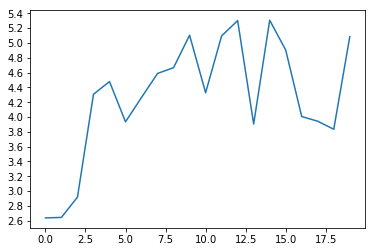

In [10]:
showPlot(losses)

In [11]:
evaluateRandomly(generator, input_lang, pairs)

> j en suis familier .
= i m accustomed to this .
< i m . <EOS>

> vous etes seul n est ce pas ?
= you re alone aren t you ?
< you re . <EOS>

> tu n es pas totalement irreprochable .
= you re not totally blameless .
< you re . <EOS>

> tu es une de ces menteuses !
= you are such a liar !
< you re . <EOS>

> j en ai assez de tes recriminations .
= i m sick of your complaints .
< i m you . <EOS>

> il est a velo .
= he is riding a bicycle .
< he s . <EOS>

> nous ne sommes pas des tueuses .
= we re not killers .
< we re . <EOS>

> elles sont toutes fausses .
= they re all fake .
< he s . <EOS>

> je suis depourvue d ambition .
= i m unambitious .
< i m . <EOS>

> tu es l aine .
= you re the oldest .
< you re . <EOS>



In [6]:
output_words = evaluate(
    generator, "je suis trop froid .", input_lang)
# plt.matshow(attentions.numpy())
print(' '.join(output_words))

i m not . <EOS>
